In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
df = pd.read_csv(r"D:\Rohini Personal\Data Analysis\Projects Datasets\Retail Price Optimization\retail_price.csv")

In [128]:
print(df.head())

  product_id product_category_name  month_year  qty  total_price  \
0       bed1        bed_bath_table  01-05-2017    1        45.95   
1       bed1        bed_bath_table  01-06-2017    3       137.85   
2       bed1        bed_bath_table  01-07-2017    6       275.70   
3       bed1        bed_bath_table  01-08-2017    4       183.80   
4       bed1        bed_bath_table  01-09-2017    2        91.90   

   freight_price  unit_price  product_name_lenght  product_description_lenght  \
0      15.100000       45.95                   39                         161   
1      12.933333       45.95                   39                         161   
2      14.840000       45.95                   39                         161   
3      14.287500       45.95                   39                         161   
4      15.100000       45.95                   39                         161   

   product_photos_qty  ...  comp_1  ps1        fp1      comp_2  ps2  \
0                   2  ...    89.

### 1) EXPLORATORY DATA ANALYSIS (EDA)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [130]:
df['month_year'] = pd.to_datetime(df['month_year'],format = '%d-%m-%Y')
df = df.drop(['product_name_lenght','product_description_lenght','product_photos_qty'],axis = 1)
print(df.columns)

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')


In [225]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
month_year,676,2017-12-15 17:47:13.136094720,2017-01-01 00:00:00,2017-09-01 00:00:00,2018-01-01 00:00:00,2018-04-01 00:00:00,2018-08-01 00:00:00,NaN
qty,676.0,14.495562,1.0,4.0,10.0,18.0,122.0,15.443421
total_price,676.0,1422.708728,19.9,333.7,807.89,1887.3225,12095.0,1700.1231
freight_price,676.0,20.68227,0.0,14.761912,17.518472,22.713558,79.76,10.081817
unit_price,676.0,106.4968,19.9,53.9,89.9,129.99,364.0,76.182972
product_weight_g,676.0,1847.498521,100.0,348.0,950.0,1850.0,9750.0,2274.808483
product_score,676.0,4.085503,3.3,3.9,4.1,4.2,4.5,0.232021
customers,676.0,81.028107,1.0,34.0,62.0,116.0,339.0,62.05556
weekday,676.0,21.773669,20.0,21.0,22.0,23.0,23.0,0.986104
weekend,676.0,8.658284,8.0,8.0,9.0,9.0,10.0,0.7056


In [132]:
df.describe(include = object).T

,count,unique,top,freq
product_id,676,52,health7,20
product_category_name,676,9,garden_tools,160


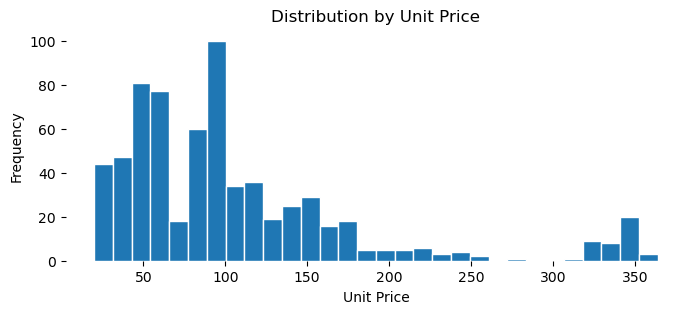

In [133]:
plt.figure(figsize = (8,3))
plt.hist(df['unit_price'],bins = 30,edgecolor = 'white')
plt.title('Distribution by Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.box(False)
plt.show()

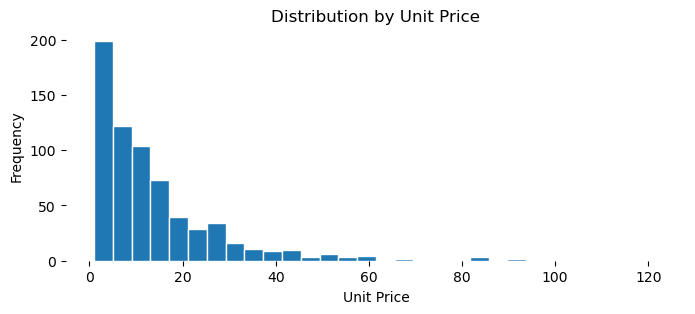

In [134]:
plt.figure(figsize = (8,3))
plt.hist(df['qty'],bins = 30,edgecolor = 'white')
plt.title('Distribution by Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.box(False)
plt.show()

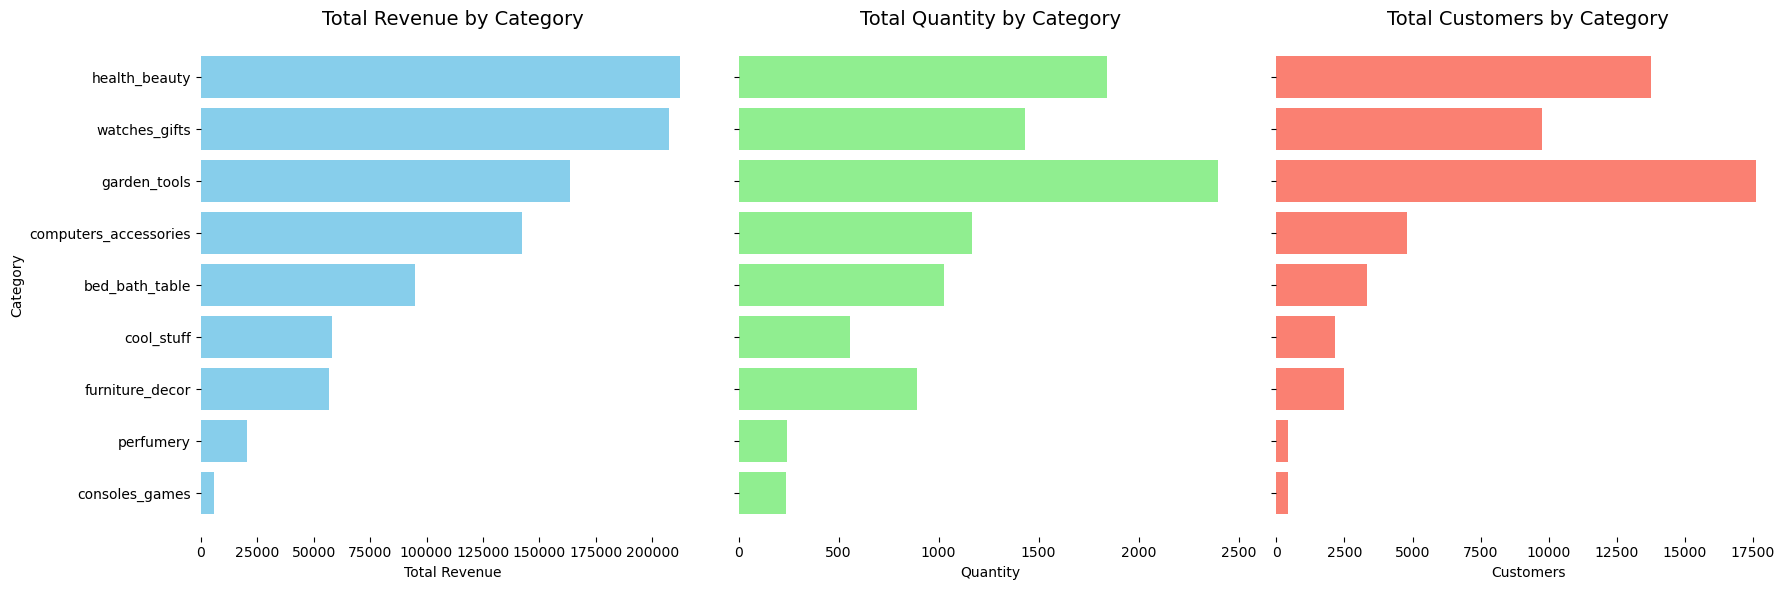

In [135]:
import matplotlib.pyplot as plt

# Aggregate data
revenue_by_category = df.groupby('product_category_name')['total_price'].sum().reset_index().sort_values(by='total_price', ascending=True)
quantity_by_category = df.groupby('product_category_name')['qty'].sum().reset_index().sort_values(by='qty', ascending=True)
customers_by_category = df.groupby('product_category_name')['customers'].sum().reset_index().sort_values(by='customers', ascending=True)

# Create a figure with 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Chart 1: Total revenue
axes[0].barh(revenue_by_category['product_category_name'], revenue_by_category['total_price'], color='skyblue')
axes[0].set_title('Total Revenue by Category',fontsize = 14)
axes[0].set_xlabel('Total Revenue')
axes[0].set_ylabel('Category')
for spine in axes[0].spines.values():
    spine.set_visible(False)

# Chart 2: Total quantity
axes[1].barh(quantity_by_category['product_category_name'], quantity_by_category['qty'], color='lightgreen')
axes[1].set_title('Total Quantity by Category',fontsize = 14)
axes[1].set_xlabel('Quantity')
for spine in axes[1].spines.values():
    spine.set_visible(False)

# Chart 3: Total customers
axes[2].barh(customers_by_category['product_category_name'], customers_by_category['customers'], color='salmon')
axes[2].set_title('Total Customers by Category',fontsize = 14)
axes[2].set_xlabel('Customers')
for spine in axes[2].spines.values():
    spine.set_visible(False)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

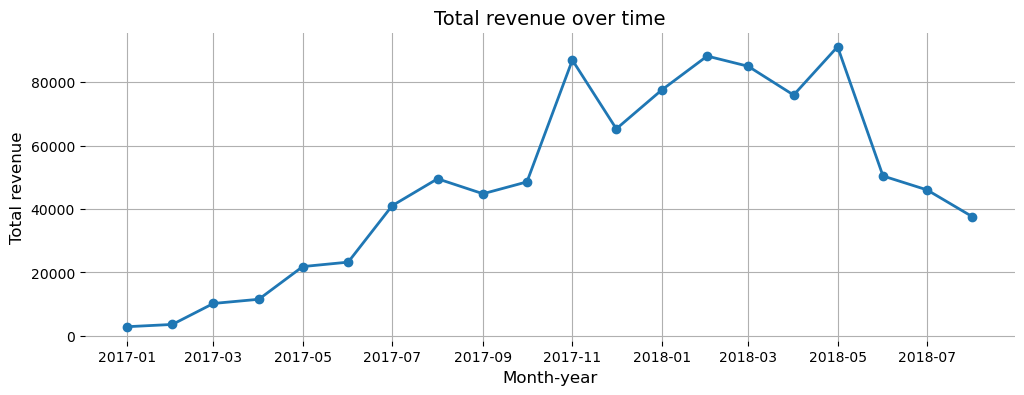

In [136]:
monthly_revenue = df.groupby('month_year')['total_price'].sum().reset_index()
plt.figure(figsize = (12,4))
plt.plot(monthly_revenue['month_year'],monthly_revenue['total_price'], marker = 'o', linewidth =2 )
plt.title('Total revenue over time',fontsize = 14)
plt.xlabel('Month-year',fontsize = 12)
plt.ylabel('Total revenue', fontsize = 12)
plt.grid()
plt.box(False)
plt.show()

### 2)FEATURE ENGINEERING

In [137]:
# Lag price
df['lag_price'] = df.groupby('product_id')['unit_price'].shift(1)

# Price change %
df['price_change_pct'] = (df['unit_price'] - df['lag_price']) / df['lag_price'].replace(0, np.nan)

# Competitive price metrics
df['comp_min'] = df[['comp_1', 'comp_2', 'comp_3']].min(axis=1)
df['comp_gap'] = df['unit_price'] - df['comp_min']

# Log transforms for elasticity
df['log_qty'] = np.log1p(df['qty'])
df['log_price'] = np.log1p(df['unit_price'])
df['log_comp_min'] = np.log1p(df['comp_min'])

print("Feature engineering completed.")

Feature engineering completed.


### 3)CALCULATING PRICE ELASTICITY

In [153]:
import pandas as pd
df = df.sort_values(['product_id', 'month_year'])

elasticity_summary = []
for product in df['product_id'].unique():
    df_prod = df[df['product_id'] == product].copy()

    # Skip products with too few observations
    if df_prod.shape[0] < 2:
        continue
    
    # Calculate consecutive changes
    df_prod['delta_qty'] = df_prod['qty'].diff()
    df_prod['delta_price'] = df_prod['unit_price'].diff()
    df_prod['avg_qty'] = (df_prod['qty'] + df_prod['qty'].shift(1)) / 2
    df_prod['avg_price'] = (df_prod['unit_price'] + df_prod['unit_price'].shift(1)) / 2
    
    # Remove rows with zero denominators to avoid division by zero
    df_prod = df_prod[(df_prod['avg_qty'] != 0) & (df_prod['avg_price'] != 0)]
    
    # Drop first row (NaN from diff) and any remaining NaNs
    df_prod = df_prod.dropna(subset=['delta_qty', 'delta_price', 'avg_qty', 'avg_price'])
    
    # Skip if no rows left
    if df_prod.empty:
        continue
    
    # Calculate midpoint elasticity
    df_prod['elasticity'] = (df_prod['delta_qty'] / df_prod['avg_qty']) / \
                            (df_prod['delta_price'] / df_prod['avg_price'])
    
    # Remove infinite or NaN values
    df_prod = df_prod.replace([float('inf'), -float('inf')], pd.NA).dropna(subset=['elasticity'])
    
    # Skip if elasticity is empty after cleanup
    if df_prod['elasticity'].empty:
        continue
    
    # Average elasticity for the product
    avg_elasticity = df_prod['elasticity'].mean(skipna=True)
    elasticity_summary.append([product, avg_elasticity])

# Create final DataFrame
elasticity_df = pd.DataFrame(elasticity_summary, columns=['product_id', 'price_elasticity'])

In [156]:
# Get unique product-category mapping
monthly = df[['product_id', 'month']].drop_duplicates()

# Merge with elasticity
elasticity_df = elasticity_df.merge(monthly, on='product_id', how='left')

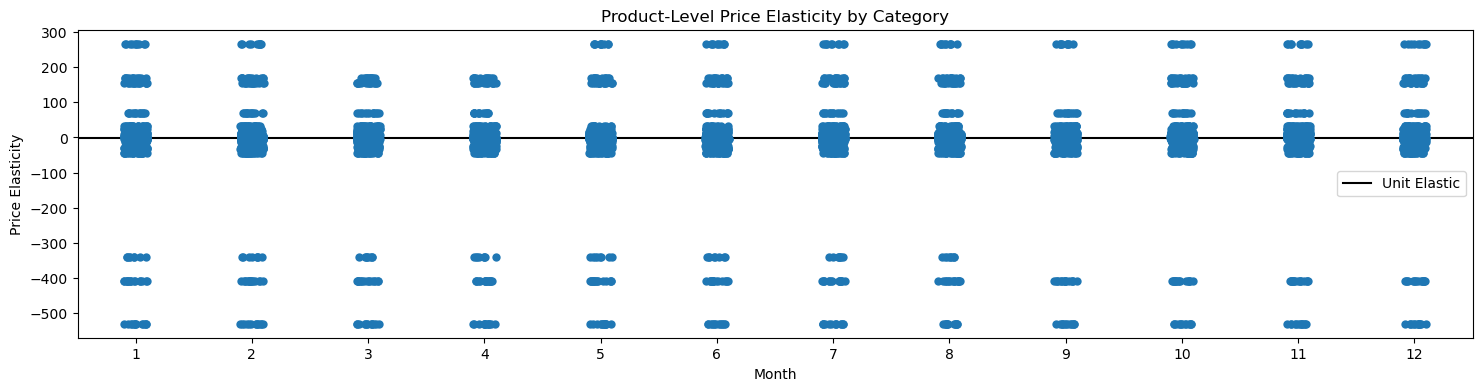

In [226]:
plt.figure(figsize=(18,4))
# Scatter plot with products on x-axis (as points), categories on y-axis
sns.stripplot(
    y='price_elasticity',
    x='month',
    data=elasticity_df, 
    dodge=False,               
    jitter=True,
    size=6,
)
# Reference line for unit elasticity
plt.axhline(-1, color='black', linestyle='-', label='Unit Elastic')
plt.title('Product-Level Price Elasticity by Category')
plt.xlabel('Month')
plt.ylabel('Price Elasticity')
plt.legend()
plt.show()

### 4)DEMAND FORECASTING

##### Built Random Forest model to predict the demand

In [167]:
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
import os

In [168]:
#Feature Selection
feature_cols = ['unit_price','comp_min', 'comp_gap','lag_price','freight_price',
               'product_score','customers','holiday','weekend','month']
X = df[feature_cols + ['product_category_name']]
X = pd.get_dummies(X, columns = ['product_category_name'],drop_first = True)
y = df['qty']

In [174]:
# Time based split
split_index = int(len(df)*0.8)
X_train, X_test = X.iloc[:split_index],X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index],y.iloc[split_index:]

In [175]:
#Train Model
rf = RandomForestRegressor(n_estimators = 200, random_state = 42)
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [177]:
#Evaluate
y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Model MAE: {mae:.2f}")
print(f"Model RMSE: {rmse:.2f}")

Model MAE: 13.24
Model RMSE: 16.98


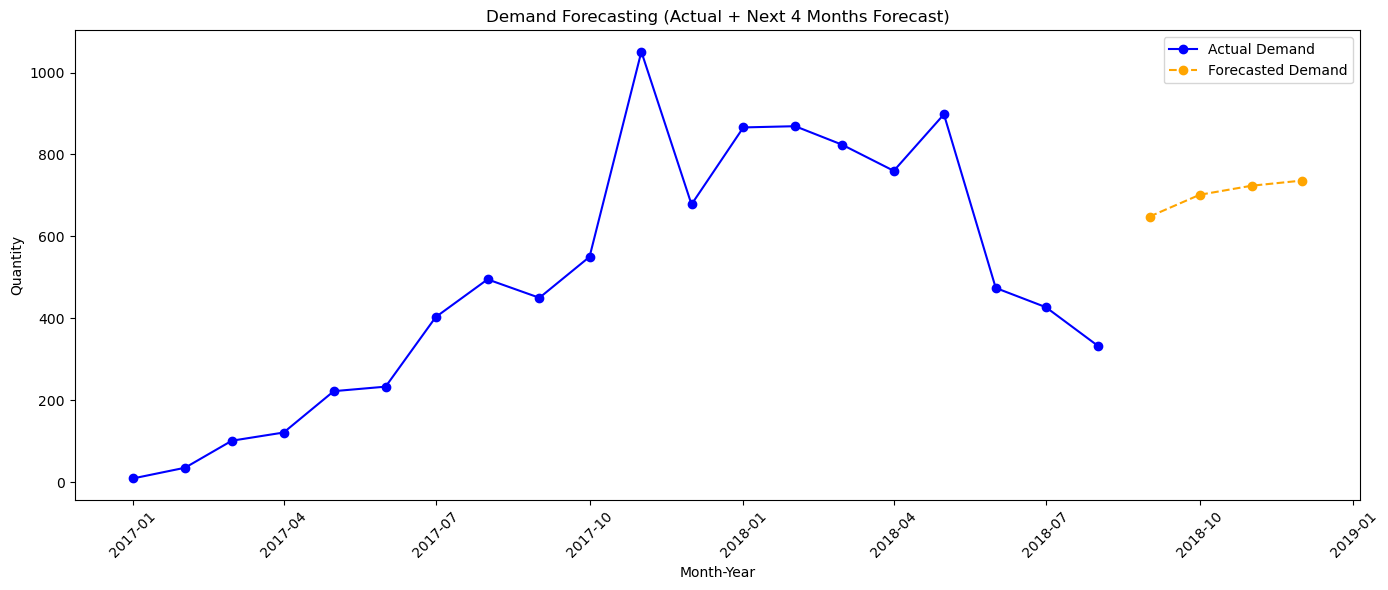

In [176]:
# 1️⃣ Prepare features for forecasting
# -----------------------------
# Assume 'month_year' is a datetime column in df
last_date = df['month_year'].max()
forecast_dates = pd.date_range(start=last_date + pd.offsets.MonthBegin(1), 
                               periods=4, freq='MS')  # next 4 months

# Create forecast DataFrame: replicate last known row per product for simplicity
products = df['product_id'].unique()
forecast_list = []
for product in products:
    last_row = df[df['product_id']==product].iloc[-1].copy()
    for date in forecast_dates:
        new_row = last_row.copy()
        new_row['month_year'] = date
        # Update month feature
        new_row['month'] = date.month
        forecast_list.append(new_row)

forecast_df = pd.DataFrame(forecast_list)

# -----------------------------
# 2️⃣ Prepare features for prediction
# -----------------------------
feature_cols = ['unit_price', 'comp_min', 'comp_gap', 'lag_price',
                'freight_price', 'product_score', 'customers', 's',
                'holiday', 'weekend', 'month']

X_forecast = forecast_df[feature_cols + ['product_category_name']]
X_forecast = pd.get_dummies(X_forecast, columns=['product_category_name'], drop_first=True)

# Ensure same columns as training
missing_cols = set(X_train.columns) - set(X_forecast.columns)
for c in missing_cols:
    X_forecast[c] = 0
X_forecast = X_forecast[X_train.columns]  # reorder columns

# -----------------------------
# 3️⃣ Predict demand
# -----------------------------
forecast_df['predicted_qty'] = rf.predict(X_forecast)

# -----------------------------
# 4️⃣ Aggregate monthly for visualization
# -----------------------------
monthly_forecast = forecast_df.groupby('month_year')['predicted_qty'].sum().reset_index()

# Actual monthly demand
actual_monthly = df.groupby('month_year')['qty'].sum().reset_index()

# Combine for plotting
plot_df = pd.merge(actual_monthly, monthly_forecast, on='month_year', how='outer')
plot_df = plot_df.sort_values('month_year')

# -----------------------------
# 5️⃣ Plot line chart
# -----------------------------
plt.figure(figsize=(14,6))
plt.plot(plot_df['month_year'], plot_df['qty'], label='Actual Demand', color='blue', marker='o')
plt.plot(plot_df['month_year'], plot_df['predicted_qty'], label='Forecasted Demand', color='orange', marker='o', linestyle='--')
plt.title('Demand Forecasting (Actual + Next 4 Months Forecast)')
plt.xlabel('Month-Year')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### PRICE OPTIMIZATION

##### Step 1: Take the current price of a product and its features (like category, competition, etc.).

##### Step 2: Try a range of prices (from 80% to 120% of the current price).

##### Step 3: Use the trained model to predict sales quantity for each price.

##### Step 4: Calculate the revenue = price × predicted quantity for each price.

##### Step 5: Identify the price that gives the highest predicted revenue (optimal price).

##### Step 6: Compare the current revenue vs optimized revenue to calculate potential improvement (in %).

##### Step 7: visualise Price change percent vs revenue change percent

In [185]:
results = []
latest_data = df.sort_values('month_year').groupby('product_id').tail(1)

In [199]:
#iterate over the single rows
for _ , row in latest_data.iterrows():
    product_id = row['product_id']
    current_price = row['unit_price']
    comp_min = row['comp_min']
    comp_gap = row['comp_gap']
    row_features = row.to_dict()

    #initialize varible and set default values for now    
    best_price = current_price
    best_revenue = 0
    best_qty = 0

    # Iterate price range (80% to 120%)
    #Splitting the price to 21 different 21 brackets from 80% to 120% of the current price
    for price in np.linspace(0.8 * current_price, 1.2 * current_price, 21):
        test_row = row_features.copy()
        test_row['unit_price'] = price
        test_row['comp_gap'] = price - comp_min

        # Prepare input for prediction
        X_test_single = pd.DataFrame([test_row])[feature_cols + ['product_category_name']]
        X_test_single = pd.get_dummies(X_test_single, columns=['product_category_name'], drop_first=True)
        X_test_single = X_test_single.reindex(columns=X.columns, fill_value=0)

        predicted_qty = rf.predict(X_test_single)[0]
        revenue = price * predicted_qty

        if revenue > best_revenue:
            best_price = price
            best_revenue = revenue
            best_qty = predicted_qty

    # Predict revenue for current price
    X_test_current = pd.DataFrame([row_features])[feature_cols + ['product_category_name']]
    X_test_current = pd.get_dummies(X_test_current, columns=['product_category_name'], drop_first=True)
    X_test_current = X_test_current.reindex(columns=X.columns, fill_value=0)

    current_predicted_qty = rf.predict(X_test_current)[0]
    current_predicted_revenue = current_price * current_predicted_qty

    # Append results
    results.append([
        product_id,
        row['product_category_name'],
        current_price,
        best_price,
        best_qty,
        best_revenue,
        current_predicted_revenue,
        (best_revenue - current_predicted_revenue) / current_predicted_revenue * 100,
        
    ])

##### Created dataframe containing optimized price

In [200]:
# Convert results to DataFrame
results_df = pd.DataFrame(
    results,
    columns=[
        'product_id',
        'category',
        'current_price',
        'optimized_price',
        'predicted_qty_at_opt_price',
        'optimized_revenue',
        'current_revenue',
        'revenue_gain_percent'
    ]
)
results_df.head()

,product_id,category,current_price,optimized_price,predicted_qty_at_opt_price,optimized_revenue,current_revenue,revenue_gain_percent
0,bed5,bed_bath_table,163.39871,196.078452,22.730,4456.863206,3937.09191,13.201909
1,computers3,computers_accessories,132.97000,159.564000,25.360,4046.543040,2260.49000,79.011765
2,garden5,garden_tools,101.00000,121.200000,8.275,1002.930000,587.82000,70.618557
3,cool5,cool_stuff,84.69250,79.610950,6.585,524.238106,359.09620,45.988208
4,cool4,cool_stuff,169.99000,203.988000,5.860,1195.369680,990.19175,20.721030


In [204]:
results_df['price_change_percent']  = 100*(results_df['optimized_price']- results_df['current_price'])/results_df['current_price']

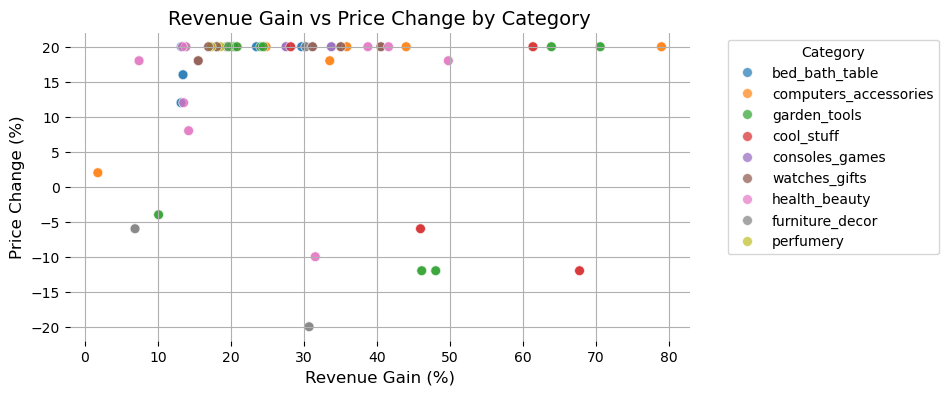

In [224]:
plt.figure(figsize=(8,4))
sns.scatterplot(
    data=results_df,
    y='price_change_percent',
    x='revenue_gain_percent',
    hue='category',  # color by category
    palette='tab10',             # optional: color palette
    s=50,                       # size of points
    alpha=0.7                    # transparency
)
plt.title("Revenue Gain vs Price Change by Category", fontsize=14)
plt.ylabel('Price Change (%)', fontsize=12)
plt.xlabel('Revenue Gain (%)', fontsize=12)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.box(False)
plt.show()